In [115]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dataset_path = './data/v1_world-happiness-report-2017.csv'

def read_dataset(path):
    df = pd.read_csv(path)
    return df

# Linear regression with sklearn

In [116]:
def get_linear_regression(dataset, input_cols, output_col):
    dataset = dataset.dropna(subset=input_cols)
    
    x_train, x_test, y_train, y_test = train_test_split(dataset[input_cols], dataset[output_col], test_size= 0.35)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    # print(f"f(x) = {model.intercept_} + {model.coef_[0]} * x")
    predictions = model.predict(x_test)
    
    if len(input_cols) == 1:
        plt.plot(x_test, y_test, 'yo', label = 'Actual')
        plt.plot(x_test, predictions, 'g^', label = "Predicted")
        plt.title('computed validation and real validation data')
        plt.xlabel(", ".join(input_cols))
        plt.ylabel(output_col)
        plt.legend()
        plt.show()
        
    if len(input_cols) == 2:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x_test[input_cols[0]], x_test[input_cols[1]], y_test, c='purple', label='Actual')
        ax.scatter(x_test[input_cols[0]], x_test[input_cols[1]], predictions, c='yellow', marker='^',label='Predicted')
        ax.set_xlabel(input_cols[0])
        ax.set_ylabel(input_cols[1])
        ax.set_zlabel(output_col)
        ax.set_title('computed validation and real validation data')
        ax.legend()
        plt.show()
    
    print(f"Error: {mean_squared_error(y_test, predictions):.2f}")
    
    return model

# Predicting the happiness based on the GDP per Capita

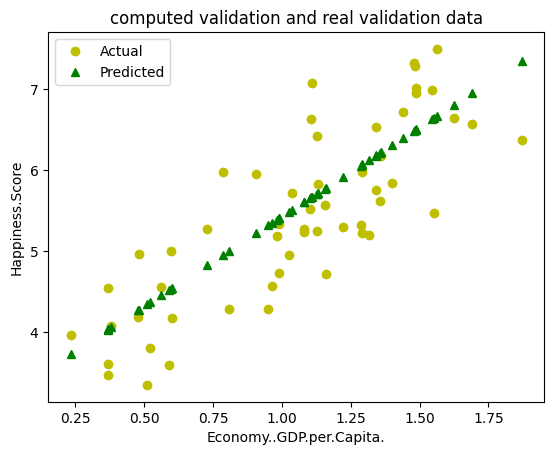

Error: 0.40


In [117]:
model_gpd_capita = get_linear_regression(read_dataset(dataset_path), ['Economy..GDP.per.Capita.'], 'Happiness.Score')

def run_model():
    gdp_capita = int(input("Enter GDP per Capita: "))    
    print(f"Prediction (GPD per Capita = {gdp_capita}):")
    print(f"Happiness score = {model_gpd_capita.predict([[gdp_capita]])[0]}")

# Predicting the happiness based on the Family score

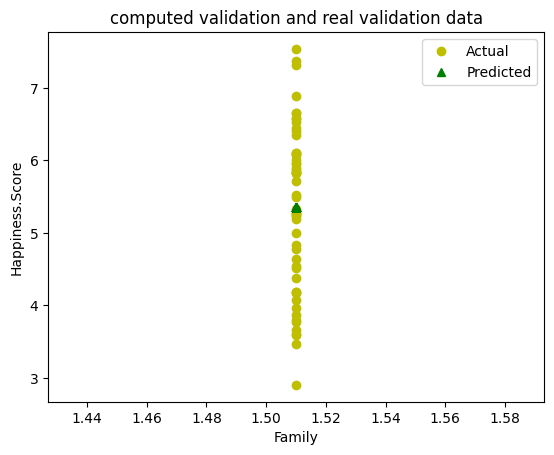

Error: 1.24


In [118]:
model_family = get_linear_regression(read_dataset(dataset_path), ['Family'], 'Happiness.Score')

def run_model2():
    family = int(input("Enter Family: "))    
    print(f"Prediction (Family = {family}):")
    print(f"Happiness score = {model_family.predict([[family]])[0]}")

# Predicting the happiness based on the GDP per Capita and Freedom score

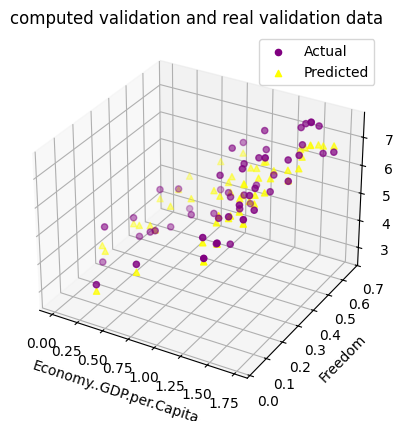

Error: 0.38


In [120]:
model_gdb_freedom = get_linear_regression(read_dataset(dataset_path), ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

def run_model3():
    gdp_capita = int(input("Enter GDP capita: "))    
    freedom = int(input("Enter freedom: "))    
    print(f"Prediction:")
    print(f"Happiness score = {model_family.predict([[gdp_capita, freedom]])[0]}")
    